In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/ratings.csv")
dados

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [3]:
dados.shape

(100836, 4)

In [4]:
dados.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [5]:
dados.columns = "UsuarioID", "FilmeID", "Nota", "Momento"
dados.head()

,UsuarioID,FilmeID,Nota,Momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
dados["Nota"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: Nota, Length: 100836, dtype: float64

In [7]:
dados["Nota"].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [8]:
dados["Nota"].value_counts()

Nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [9]:
dados["Nota"].mean()

np.float64(3.501556983616962)

<Axes: >

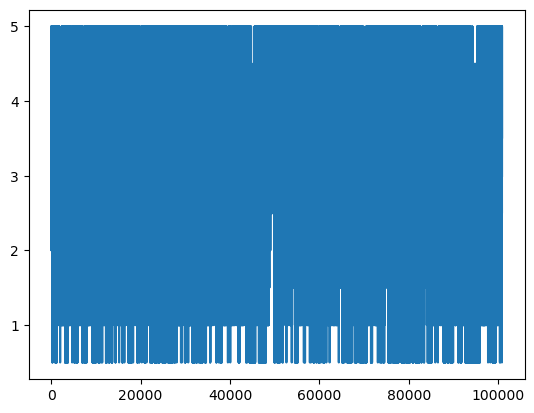

In [10]:
dados["Nota"].plot()

<Axes: ylabel='Frequency'>

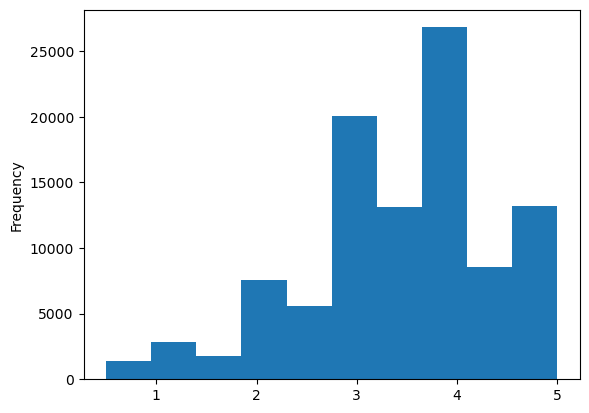

In [11]:
dados["Nota"].plot(kind='hist')

In [12]:
dados["Nota"].median()

3.5

In [13]:
media = dados["Nota"].mean()
mediana = dados["Nota"].median()
print(f'A media: {media} e a Mediana: {mediana}')

A media: 3.501556983616962 e a Mediana: 3.5


In [14]:
dados["Nota"].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: Nota, dtype: float64

<Axes: ylabel='Nota'>

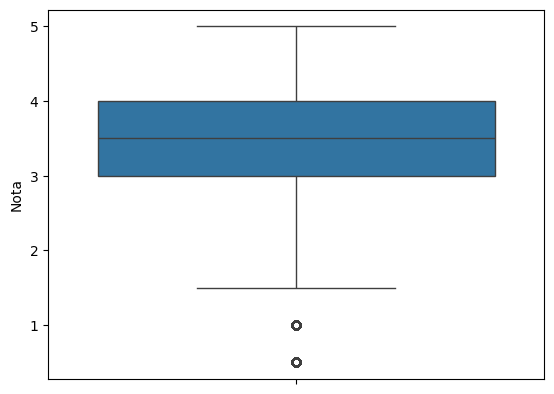

In [15]:
import seaborn as sns
sns.boxplot(dados["Nota"])

In [16]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/movies.csv")
filmes.columns = "FilmeID", "Titulo", "Genero"
filmes

,FilmeID,Titulo,Genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [17]:
dados.query("FilmeID==1")["Nota"].mean()

np.float64(3.9209302325581397)

In [18]:
dados.query("FilmeID==2")["Nota"].mean()

np.float64(3.4318181818181817)

In [19]:
media_por_filme = dados.groupby("FilmeID")["Nota"].mean()
media_por_filme

FilmeID
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: Nota, Length: 9724, dtype: float64

<Axes: ylabel='Frequency'>

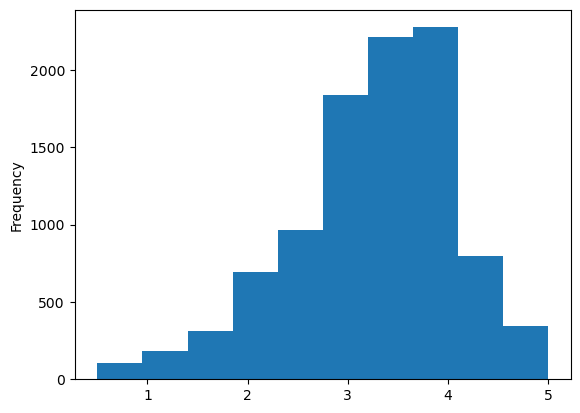

In [20]:
media_por_filme.plot(kind='hist')

<Axes: ylabel='Nota'>

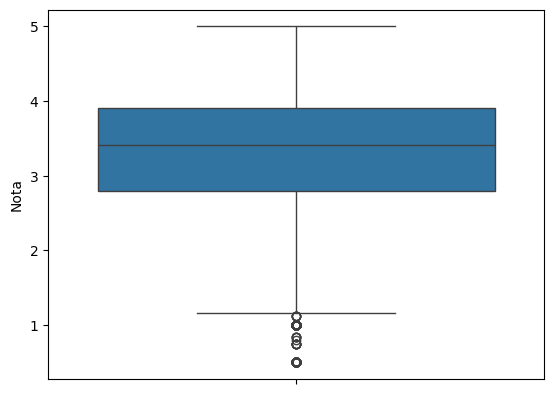

In [21]:
sns.boxplot(media_por_filme)

In [22]:
media_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: Nota, dtype: float64

Text(0.5, 1.0, 'Histograma das media de filmes')

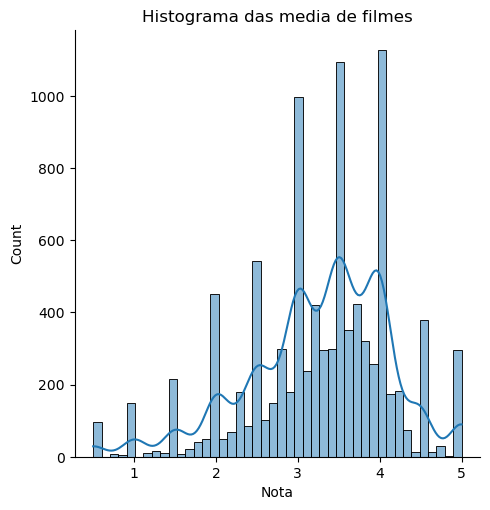

In [23]:
import matplotlib.pyplot as plt
sns.displot(media_por_filme, kde=True)
plt.title("Histograma das media de filmes")

In [24]:
tmdb = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


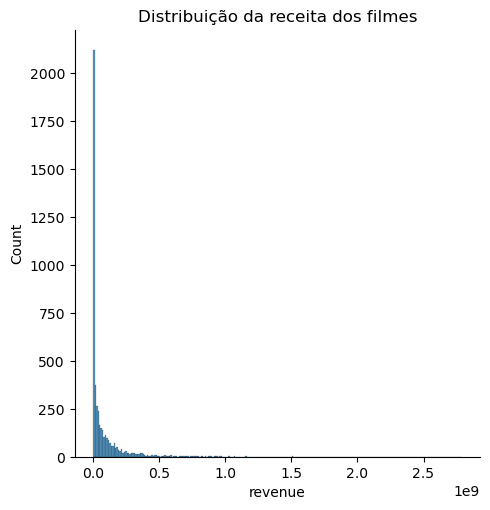

In [25]:
sns.displot(tmdb["revenue"])
plt.title("Distribuição da receita dos filmes")
plt.show()

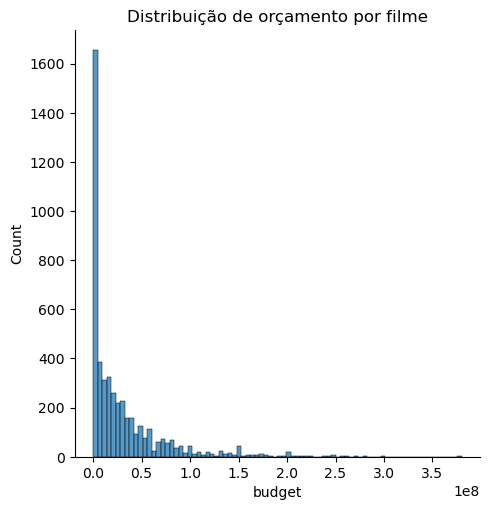

In [26]:
sns.displot(tmdb["budget"])
plt.title("Distribuição de orçamento por filme")
plt.show()

In [27]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [28]:
com_faturamento = tmdb.query("revenue > 0")

In [29]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [30]:
com_faturamento.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,3.376000e+03,3376.000000,3376.000000,3.376000e+03,3376.000000,3376.000000,3376.000000
mean,3.888424e+07,45518.799171,28.260492,1.170314e+08,110.382109,6.308738,944.422690
std,4.420490e+07,74725.406344,35.622362,1.834831e+08,21.116082,0.882279,1392.846418
min,0.000000e+00,5.000000,0.019984,5.000000e+00,0.000000,0.000000,0.000000
25%,8.500000e+06,5538.250000,9.957286,1.535290e+07,96.000000,5.800000,160.750000
50%,2.500000e+07,11581.500000,19.755221,5.175184e+07,106.000000,6.300000,440.500000
75%,5.200000e+07,47370.750000,36.425937,1.401651e+08,121.000000,6.900000,1091.250000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [31]:
len(tmdb)

4803

In [32]:
len(com_faturamento)

3376

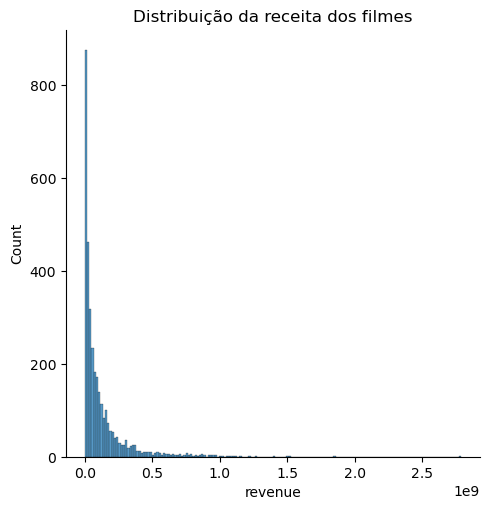

In [33]:
sns.displot(com_faturamento["revenue"])
plt.title("Distribuição da receita dos filmes")
plt.show()

In [34]:
tmdb["original_language"].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [35]:
tmdb["original_language"].value_counts()

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
id       2
cs       2
ta       2
ro       2
ar       2
te       1
hu       1
xx       1
af       1
is       1
tr       1
vi       1
pl       1
nb       1
ky       1
no       1
sl       1
ps       1
el       1
Name: count, dtype: int64

In [36]:
faturamento_maior_que_cem_milhoes = com_faturamento.query("revenue > 100000000")
len(faturamento_maior_que_cem_milhoes)

1126

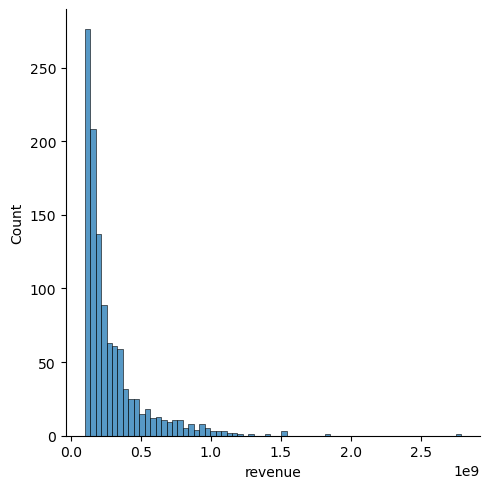

In [37]:
sns.displot(faturamento_maior_que_cem_milhoes["revenue"])

In [38]:
faturamento_maior_que_cem_milhoes

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441,858000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 18, ""...",http://movies.disney.com/bambi,3170,"[{""id"": 5774, ""name"": ""forest""}, {""id"": 10683,...",en,Bambi,Bambi's tale unfolds from season to season as ...,47.651878,"[{""name"": ""Walt Disney Productions"", ""id"": 3166}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1942-08-14,267447150,70.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A great love story.,Bambi,6.8,1405
4467,777000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,838,"[{""id"": 455, ""name"": ""farewell""}, {""id"": 578, ...",en,American Graffiti,A couple of high school graduates spend one fi...,19.326115,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Uni...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1973-08-01,140000000,110.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Where were you in '62?,American Graffiti,6.9,324
4496,60000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",http://www.blairwitch.com/,2667,"[{""id

In [39]:
tmdb["original_language"].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ko', 'ru', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'id', 'cs', 'ta', 'ro', 'ar', 'te',
       'hu', 'xx', 'af', 'is', 'tr', 'vi', 'pl', 'nb', 'ky', 'no', 'sl', 'ps',
       'el'],
      dtype='object', name='original_language')

In [40]:
tmdb["original_language"].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [41]:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head(10)

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ko,11


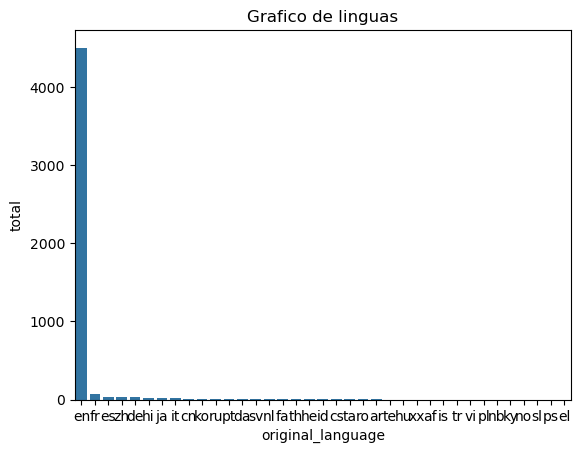

In [42]:
sns.barplot(data = contagem_de_lingua, x="original_language", y="total")
plt.title("Grafico de linguas")
plt.show()

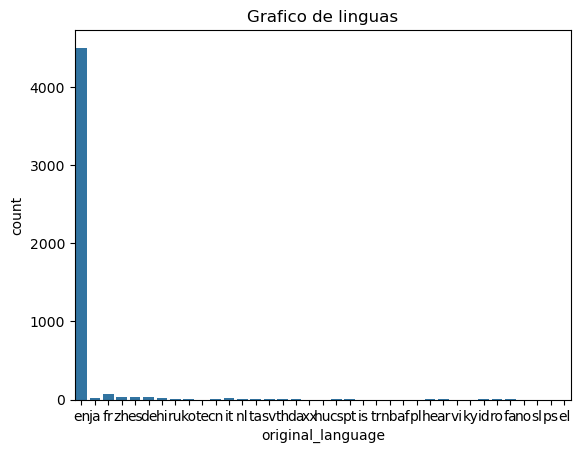

In [43]:
sns.countplot(data = tmdb, x="original_language")
plt.title("Grafico de linguas")
plt.show()

<Axes: ylabel='total'>

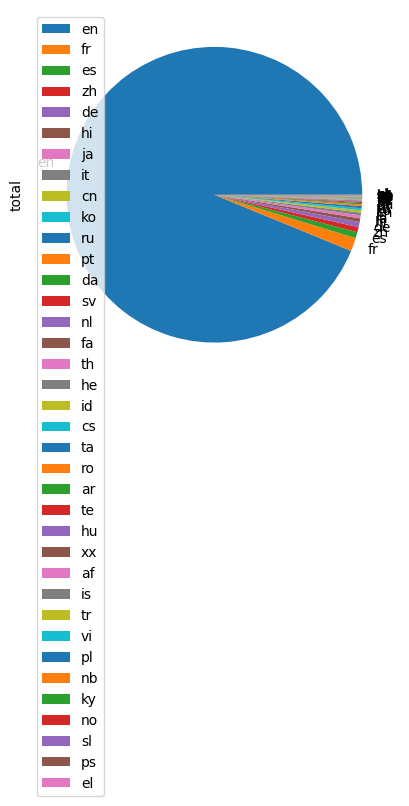

In [44]:
contagem_de_lingua.plot(kind="pie", y="total", labels=contagem_de_lingua["original_language"])

In [45]:
total_por_linguas = tmdb["original_language"].value_counts()
total_geral = total_por_linguas.sum()
total_ingles = total_por_linguas.loc["en"]
total_do_resto = total_geral - total_ingles
print(total_geral, total_ingles, total_do_resto)

4803 4505 298


In [46]:
dados = {
  "lingua" :["ingles", "outros"],
  "total" : [total_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


<Axes: xlabel='lingua', ylabel='total'>

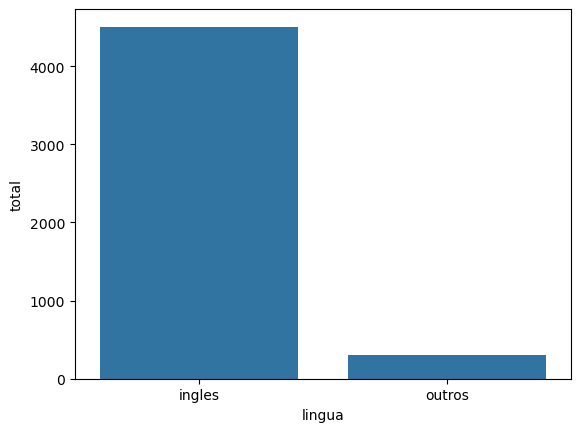

In [47]:
sns.barplot(data = dados, x="lingua", y="total")

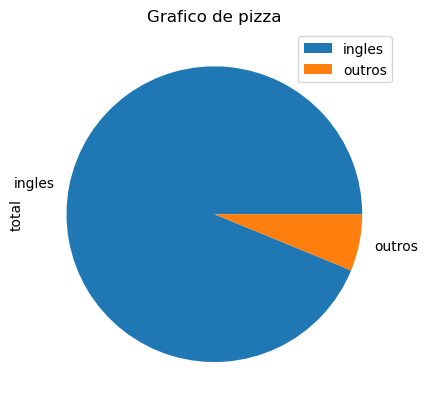

In [48]:
dados.plot(kind="pie", y="total", labels=dados["lingua"])
plt.title("Grafico de pizza")
plt.show()

In [49]:
total_por_linguas 

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
id       2
cs       2
ta       2
ro       2
ar       2
te       1
hu       1
xx       1
af       1
is       1
tr       1
vi       1
pl       1
nb       1
ky       1
no       1
sl       1
ps       1
el       1
Name: count, dtype: int64

In [50]:
total_sem_ingles = total_por_linguas.drop('en').reset_index()
total_sem_ingles.columns = ["linguas", "total"]
total_sem_ingles

,linguas,total
0,fr,70
1,es,32
2,zh,27
3,de,27
4,hi,19
5,ja,16
6,it,14
7,cn,12
8,ko,11
9,ru,11


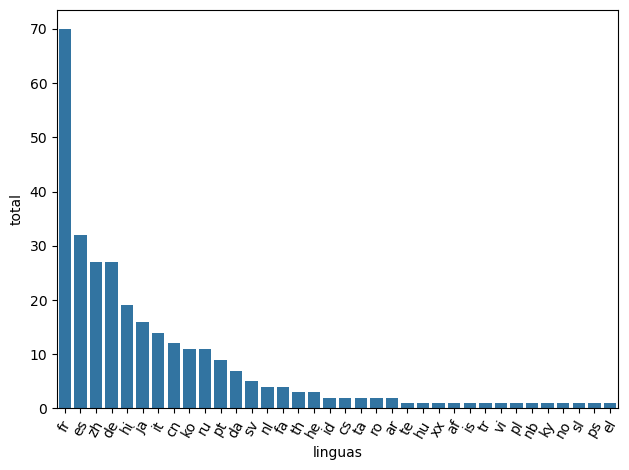

In [51]:
sns.barplot(data = total_sem_ingles, x="linguas", y="total")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [52]:
filmes_sem_ingles = tmdb.query("original_language != 'en'")["original_language"].value_counts()

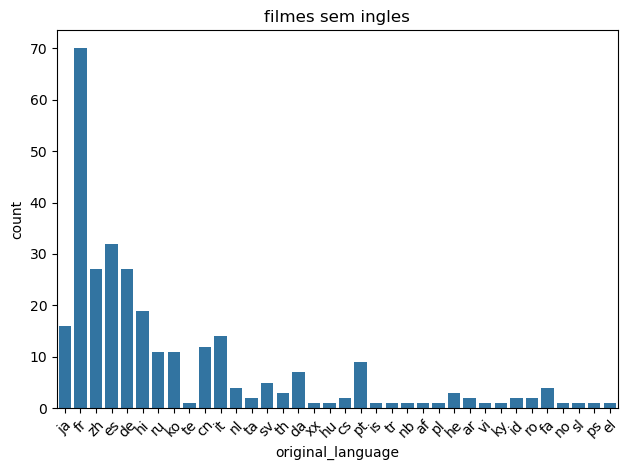

In [53]:
sns.countplot(data = tmdb.query("original_language != 'en'"), x="original_language")
plt.title("filmes sem ingles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

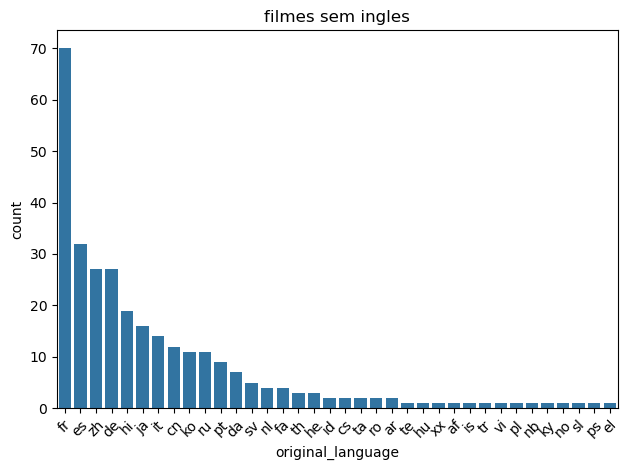

In [54]:
sns.countplot(data = tmdb.query("original_language != 'en'"),order=filmes_sem_ingles.index, x="original_language")
plt.title("filmes sem ingles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

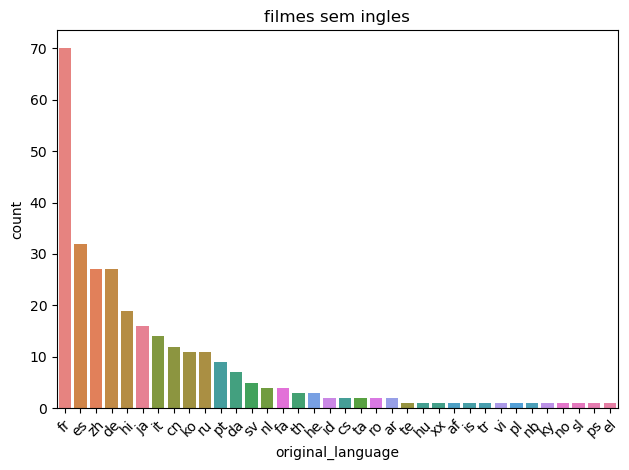

In [55]:
sns.countplot(data = tmdb.query("original_language != 'en'"),order=filmes_sem_ingles.index, x="original_language", hue="original_language")
plt.title("filmes sem ingles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

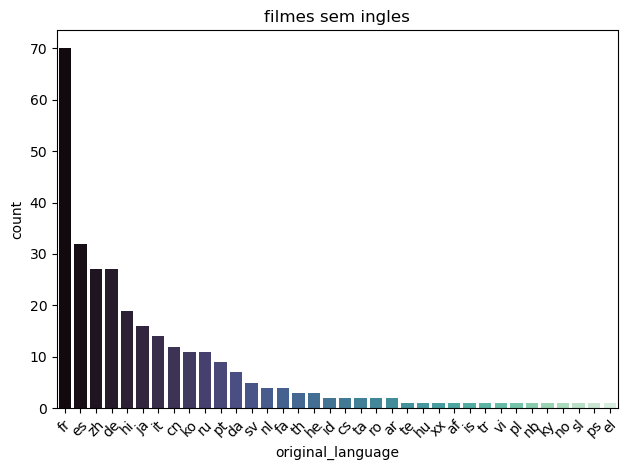

In [56]:
sns.countplot(data = tmdb.query("original_language != 'en'"),order=filmes_sem_ingles.index, x="original_language", 
              hue="original_language", 
              palette="mako",
              hue_order=filmes_sem_ingles.index)
plt.title("filmes sem ingles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

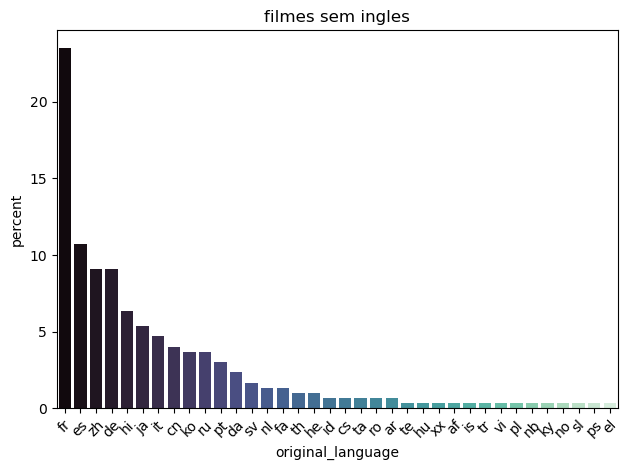

In [57]:
sns.countplot(data = tmdb.query("original_language != 'en'"),order=filmes_sem_ingles.index, x="original_language", 
              hue="original_language", 
              palette="mako",
              hue_order=filmes_sem_ingles.index,
              stat="percent")
plt.title("filmes sem ingles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [58]:
tmdb.query("original_language != 'en'")["original_language"].value_counts(normalize=True)

original_language
fr    0.234899
es    0.107383
zh    0.090604
de    0.090604
hi    0.063758
ja    0.053691
it    0.046980
cn    0.040268
ko    0.036913
ru    0.036913
pt    0.030201
da    0.023490
sv    0.016779
nl    0.013423
fa    0.013423
th    0.010067
he    0.010067
id    0.006711
cs    0.006711
ta    0.006711
ro    0.006711
ar    0.006711
te    0.003356
hu    0.003356
xx    0.003356
af    0.003356
is    0.003356
tr    0.003356
vi    0.003356
pl    0.003356
nb    0.003356
ky    0.003356
no    0.003356
sl    0.003356
ps    0.003356
el    0.003356
Name: proportion, dtype: float64

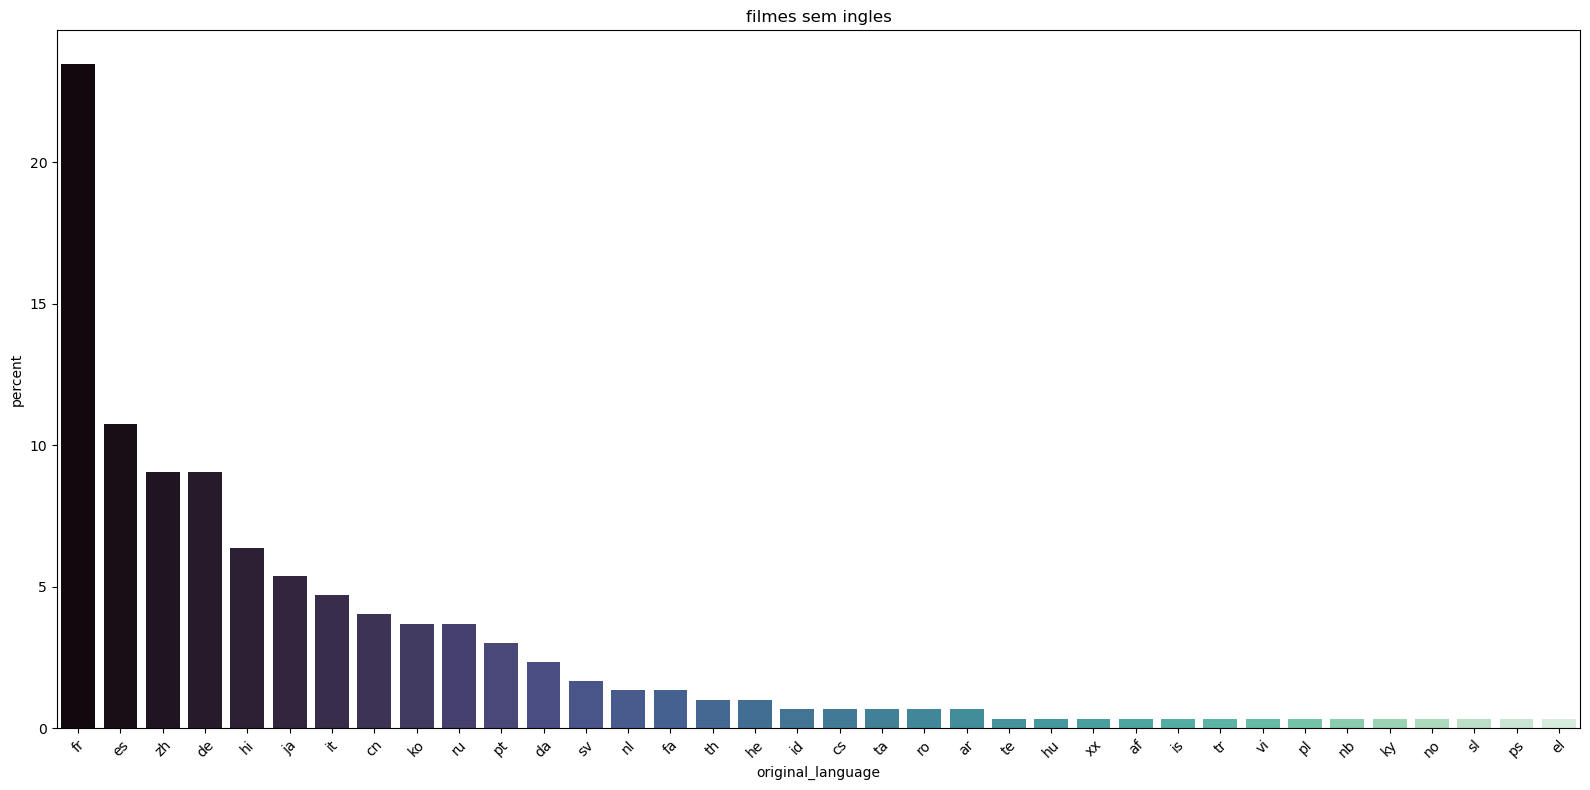

In [59]:
plt.figure(figsize=(16,8))
sns.countplot(data = tmdb.query("original_language != 'en'"),order=filmes_sem_ingles.index, x="original_language", 
              hue="original_language", 
              palette="mako",
              hue_order=filmes_sem_ingles.index,
              stat="percent")
plt.title("filmes sem ingles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [60]:
notas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/ratings.csv")
notas.columns = "UsuarioID", "FilmeID", "nota", "momento"
notas.head()

,UsuarioID,FilmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [61]:
notas_do_toy_store = notas.query("FilmeID == 1")["nota"]
notas_do_jumanji = notas.query("FilmeID == 2")["nota"]

medias_do_toy_store = notas_do_toy_store.mean()
medias_do_jumanji = notas_do_jumanji.mean()

print(medias_do_toy_store, medias_do_jumanji)

3.9209302325581397 3.4318181818181817


In [62]:
mediana_do_toy_store = notas_do_toy_store.median()
mediana_do_jumanji = notas_do_jumanji.median()

print(mediana_do_toy_store, mediana_do_jumanji)

4.0 3.5


In [63]:
import numpy as np
filme1 = [2.5] * 10 + [3.5] * 10
filme2 = [5] * 10 + [1] *10

In [64]:
filme1_np = np.array(filme1)
filme2_np = np.array(filme2)

# Cálculo da média e mediana
media_filme1 = np.mean(filme1_np)
mediana_filme1 = np.median(filme1_np)

media_filme2 = np.mean(filme2_np)
mediana_filme2 = np.median(filme2_np)

# Impressão dos resultados
print(f"Filme 1 - Média: {media_filme1}, Mediana: {mediana_filme1}")
print(f"Filme 2 - Média: {media_filme2}, Mediana: {mediana_filme2}")

Filme 1 - Média: 3.0, Mediana: 3.0
Filme 2 - Média: 3.0, Mediana: 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

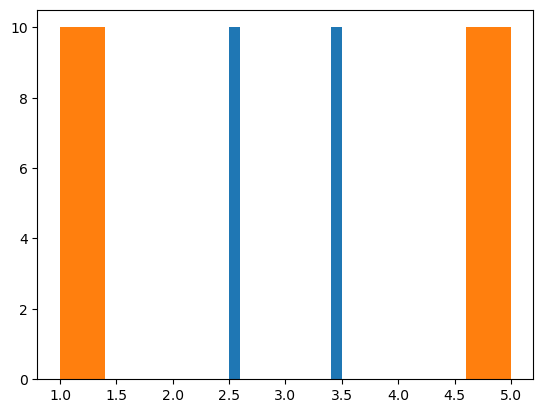

In [65]:
plt.hist(filme1)
plt.hist(filme2)

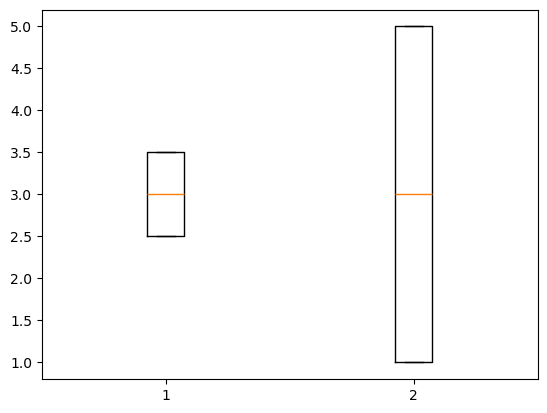

In [66]:
plt.boxplot([filme1, filme2])
plt.show()

In [67]:
filme0 = [3.0] * 20
np.mean(filme0), np.median(filme0), np.std(filme0)

(np.float64(3.0), np.float64(3.0), np.float64(0.0))

In [68]:
np.std(filme1), np.std(filme2)

(np.float64(0.5), np.float64(2.0))

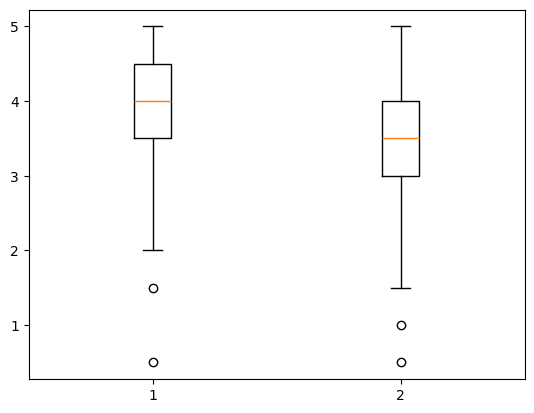

In [70]:
plt.boxplot([notas_do_toy_store, notas_do_jumanji])
plt.show()

<Axes: xlabel='FilmeID', ylabel='nota'>

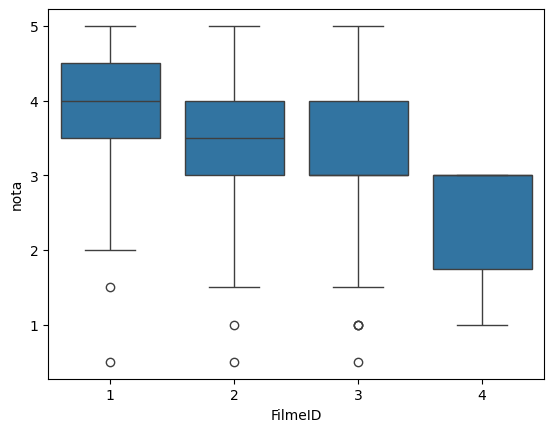

In [74]:
sns.boxplot(data = notas.query("FilmeID in [1,2,3,4]"), x="FilmeID", y="nota")

<Axes: xlabel='FilmeID', ylabel='nota'>

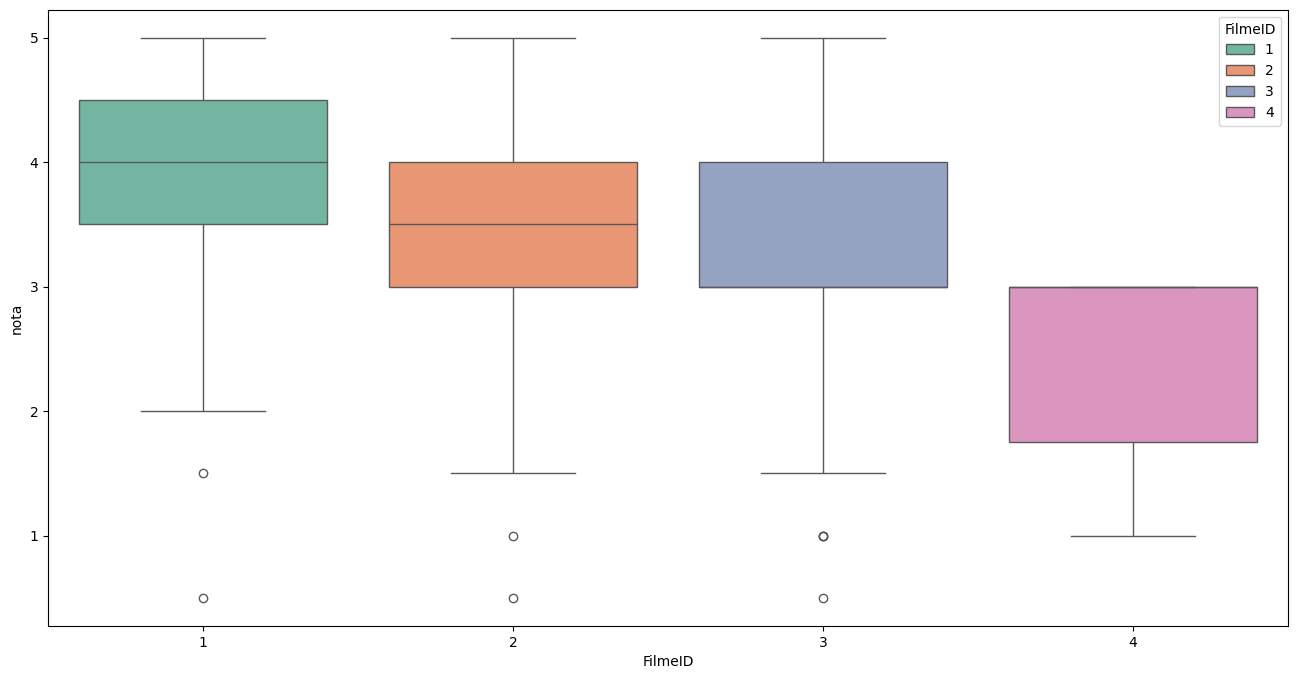

In [78]:
plt.figure(figsize=(16,8))
sns.boxplot(data = notas.query("FilmeID in [1,2,3,4]"), x="FilmeID", y="nota", hue="FilmeID", palette="Set2")

In [80]:
notas.groupby("FilmeID").count()

,UsuarioID,nota,momento
FilmeID,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1


In [81]:
notas.groupby("FilmeID").count().query("nota == 1")

,UsuarioID,nota,momento
FilmeID,,,
49,1,1,1
55,1,1,1
77,1,1,1
83,1,1,1
96,1,1,1
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1
